<a href="https://colab.research.google.com/github/Felipecuestas98/Bootcamp-Mintic/blob/main/Ejercicio_banco.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
# importa librerias de tratamiento, funciones y graficacion de datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# conecta el drive e importa el dataset del ejemplo para el ejercicio
from google.colab import drive
drive.mount('/content/drive')
ruta = '/content/drive/MyDrive/Bootcamp-Analiticas y Visualizacion de Datos/Copia de dataset_banco.csv'
data = pd.read_csv(ruta)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
# Validacion de nombre sin transformacion
print(data.shape)
data.head()

(45215, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261.0,1,-1.0,0,unknown,no
1,44,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151.0,1,-1.0,0,unknown,no
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76.0,1,-1.0,0,unknown,no
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92.0,1,-1.0,0,unknown,no
4,33,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198.0,1,-1.0,0,unknown,no


In [10]:
# renombrar las columnas a español
data_rename_2 = data.rename(columns={
                                     'age':       'edad',
                                     'job':       'empleo',
                                     'marital':   'estado civil',
                                     'education': 'escolaridad',
                                     'default':   'morosidad',
                                     'balance':   'saldo',
                                     'housing':   'vivienda',
                                     'loan':      'prestamo',
                                     'contact':   'contacto',
                                     'day':       'dia',
                                     'month':     'mes',
                                     'duration':  'duracion',
                                     'campaign':  'campaña',
                                     'pdays':     'diasprevios',
                                     'previous':  'anterior',
                                     'poutcome':  'resultado',
                                     'y':         'respuesta'})
print(data_rename_2)


       edad        empleo estado civil escolaridad morosidad   saldo vivienda  \
0        58    management      married    tertiary        no  2143.0      yes   
1        44    technician       single   secondary        no    29.0      yes   
2        33  entrepreneur      married   secondary        no     2.0      yes   
3        47   blue-collar      married     unknown        no  1506.0      yes   
4        33       unknown       single     unknown        no     1.0       no   
...     ...           ...          ...         ...       ...     ...      ...   
45210    51    technician      married    tertiary        no   825.0       no   
45211    71       retired     divorced     primary        no  1729.0       no   
45212    72       retired      married   secondary        no  5715.0       no   
45213    57   blue-collar      married   secondary        no   668.0       no   
45214    37  entrepreneur      married   secondary        no  2971.0       no   

      prestamo   contacto  

In [11]:
# Revisar variables categoricas y numericas
data_rename_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45215 entries, 0 to 45214
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   edad          45215 non-null  int64  
 1   empleo        45213 non-null  object 
 2   estado civil  45214 non-null  object 
 3   escolaridad   45214 non-null  object 
 4   morosidad     45215 non-null  object 
 5   saldo         45213 non-null  float64
 6   vivienda      45215 non-null  object 
 7   prestamo      45215 non-null  object 
 8   contacto      45215 non-null  object 
 9   dia           45215 non-null  int64  
 10  mes           45215 non-null  object 
 11  duracion      45214 non-null  float64
 12  campaña       45215 non-null  int64  
 13  diasprevios   45214 non-null  float64
 14  anterior      45215 non-null  int64  
 15  resultado     45215 non-null  object 
 16  respuesta     45215 non-null  object 
dtypes: float64(3), int64(4), object(10)
memory usage: 5.9+ MB


In [12]:
# Clasificar columnas
categoricas = data_rename_2.select_dtypes(include=['object']).columns.tolist()
numericas = data_rename_2.select_dtypes(include=['int64','float64']).columns.tolist()
print('columnas categoricas:',categoricas)
print('columnas numericas', numericas)

columnas categoricas: ['empleo', 'estado civil', 'escolaridad', 'morosidad', 'vivienda', 'prestamo', 'contacto', 'mes', 'resultado', 'respuesta']
columnas numericas ['edad', 'saldo', 'dia', 'duracion', 'campaña', 'diasprevios', 'anterior']


In [13]:
# prompt: Quiero contar el numero de registros de cada subcategoria de la variable categoricas

for columna in categoricas:
  print(f"Conteo de registros para la columna '{columna}':")
  print(data_rename_2[columna].value_counts())
  print("\n")


Conteo de registros para la columna 'empleo':
empleo
blue-collar       9731
management        9455
technician        7599
admin.            5168
services          4153
retired           2263
self-employed     1578
entrepreneur      1487
unemployed        1303
housemaid         1240
student            938
unknown            288
administrative       3
Management           2
MANAGEMENT           2
Self-employed        1
Services             1
Retired              1
Name: count, dtype: int64


Conteo de registros para la columna 'estado civil':
estado civil
married     27215
single      12787
divorced     5198
div.            7
Single          4
DIVORCED        3
Name: count, dtype: int64


Conteo de registros para la columna 'escolaridad':
escolaridad
secondary    23197
tertiary     13302
primary       6849
unknown       1855
SECONDARY        3
Primary          2
sec.             2
UNK              2
Secondary        1
Tertiary         1
Name: count, dtype: int64


Conteo de registros par

In [14]:
# visualiza las primeras lineas de tu .csv
# visualiza las variables categoricas y las numericas
# proporciona estadisticas descriptivas para columnas numericas
data_rename_2.describe()


,edad,saldo,dia,duracion,campaña,diasprevios,anterior
count,45215.000000,45213.000000,45215.000000,45214.000000,45215.000000,45214.000000,45215.000000
mean,41.004711,1374.159866,15.805839,258.074357,2.763729,40.192485,0.580383
std,12.036647,3924.255525,8.322473,257.605175,3.097910,100.120622,2.303438
min,18.000000,-8019.000000,1.000000,-1389.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,776.000000,527532.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [15]:
# LIMPIEZA DE DATOS
# Conteo de registros faltantes por columna especifica
df_faltantes = data_rename_2['empleo'].isnull().value_counts()
df_faltantes

,count
empleo,
False,45213
True,2


In [16]:
# cuenta datos nulos por columna
data_rename_2.isna().sum()

,0
edad,0
empleo,2
estado civil,1
escolaridad,1
morosidad,0
saldo,2
vivienda,0
prestamo,0
contacto,0
dia,0


In [17]:
# elimina datos filas donde hay datos faltantes
data_rename_2.dropna(inplace=True)
data_rename_2.count()

,0
edad,45207
empleo,45207
estado civil,45207
escolaridad,45207
morosidad,45207
saldo,45207
vivienda,45207
prestamo,45207
contacto,45207
dia,45207


In [18]:
data_rename_2.describe()


,edad,saldo,dia,duracion,campaña,diasprevios,anterior
count,45207.000000,45207.000000,45207.000000,45207.000000,45207.000000,45207.000000,45207.000000
mean,41.005596,1374.201318,15.806534,258.032539,2.763731,40.178225,0.580198
std,12.037399,3924.491665,8.323015,257.460759,3.098058,100.103283,2.303341
min,18.000000,-8019.000000,1.000000,-1389.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1427.500000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,776.000000,527532.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [19]:
# Contar la extension de letras en la columna educacion
data_rename_2['escolaridad'].apply(len)

,escolaridad
0,8
1,9
2,9
3,7
4,7
...,...
45210,8
45211,7
45212,9
45213,9


In [20]:
# contar los niveles de las diferentes columnas
cols_cat = categoricas
# ciclo for para contar los unicos subniveles por variable caregorica con nunique
for columna in cols_cat:
  print(f'columna {columna}: {data_rename_2[columna].nunique()} subniveles')

columna empleo: 18 subniveles
columna estado civil: 6 subniveles
columna escolaridad: 10 subniveles
columna morosidad: 2 subniveles
columna vivienda: 2 subniveles
columna prestamo: 6 subniveles
columna contacto: 5 subniveles
columna mes: 12 subniveles
columna resultado: 6 subniveles
columna respuesta: 2 subniveles


In [21]:
# calcular la desviacion estandar para las columnas numericas
desviaciones_estandar = data_rename_2[numericas].std()
# imprimir las desviaciones estandar
print(desviaciones_estandar)

edad             12.037399
saldo          3924.491665
dia               8.323015
duracion        257.460759
campaña           3.098058
diasprevios     100.103283
anterior          2.303341
dtype: float64


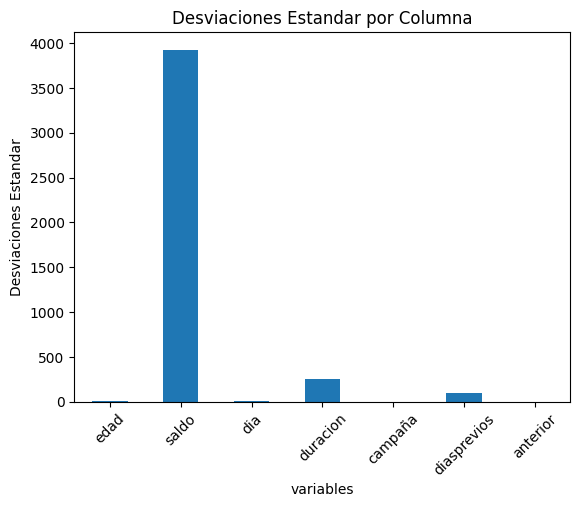

In [22]:
# crear grafica de barras para representar las desviaciones estandar
desviaciones_estandar.plot(kind='bar')
plt.title('Desviaciones Estandar por Columna')
plt.xlabel('variables')
plt.ylabel('Desviaciones Estandar')
plt.xticks(rotation=45)
plt.show()

In [23]:
# calcula la media de las columnas numericas
media = data_rename_2[numericas].mean()
# imprimir las medias
print(media)


edad             41.005596
saldo          1374.201318
dia              15.806534
duracion        258.032539
campaña           2.763731
diasprevios      40.178225
anterior          0.580198
dtype: float64


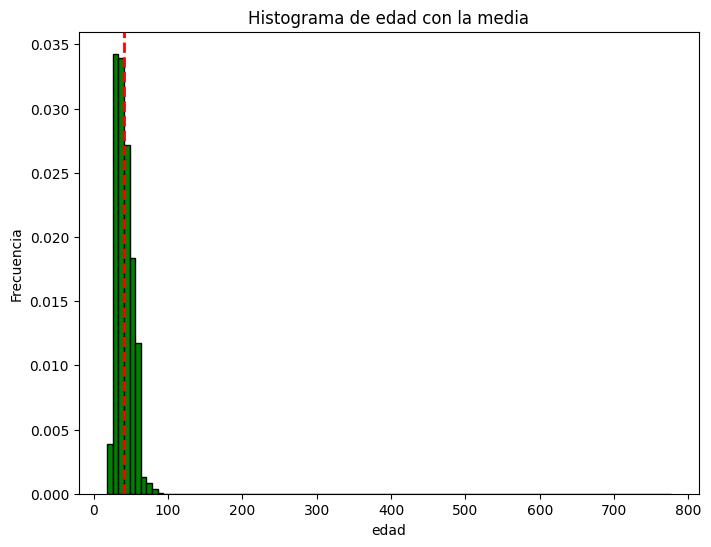

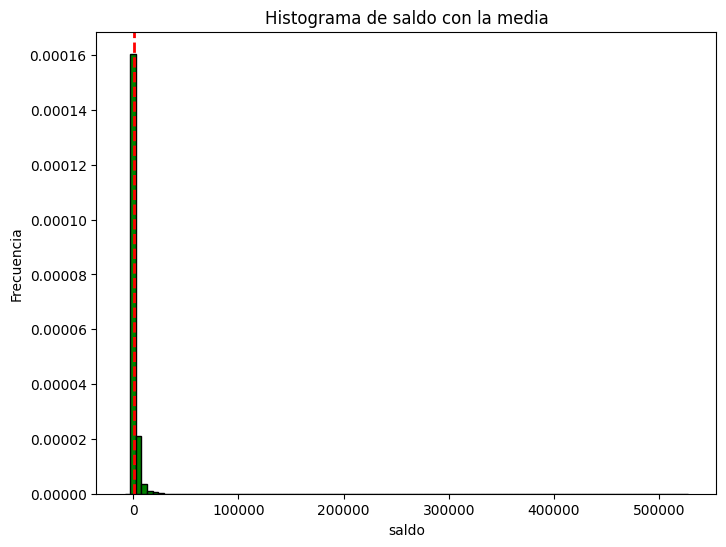

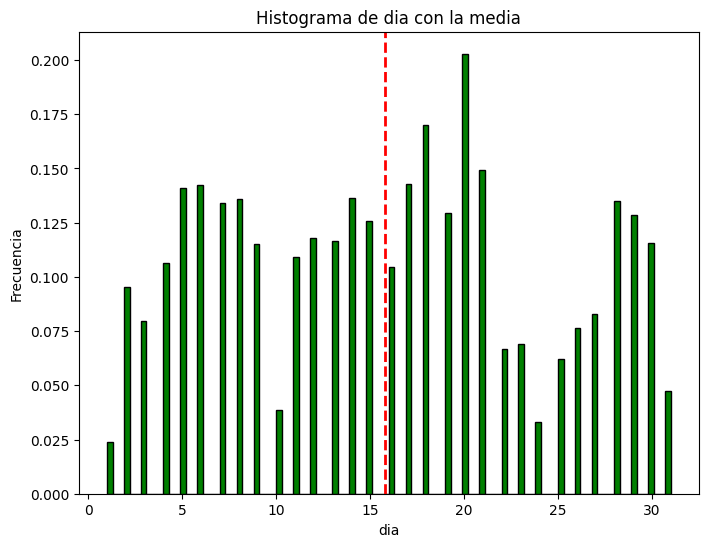

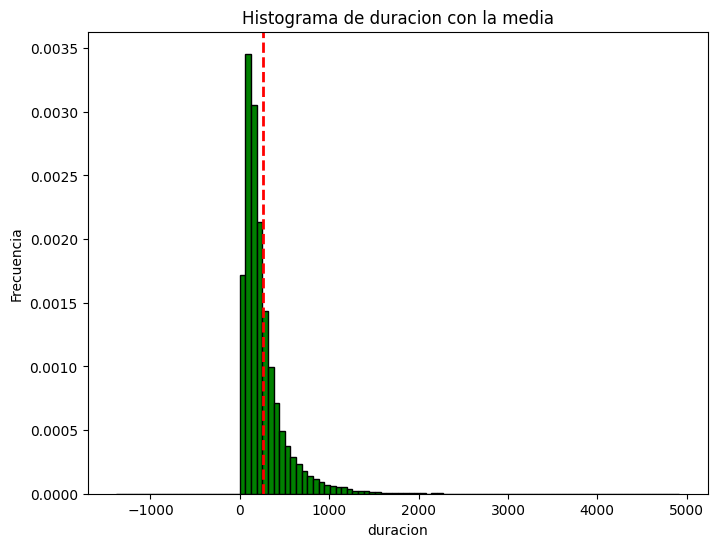

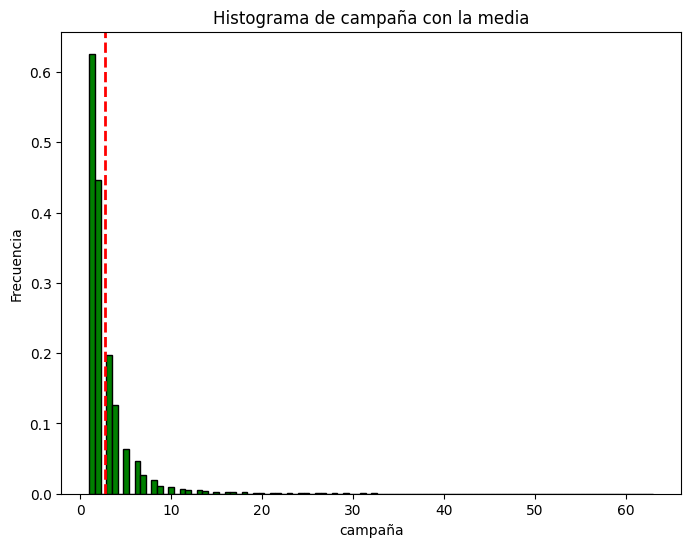

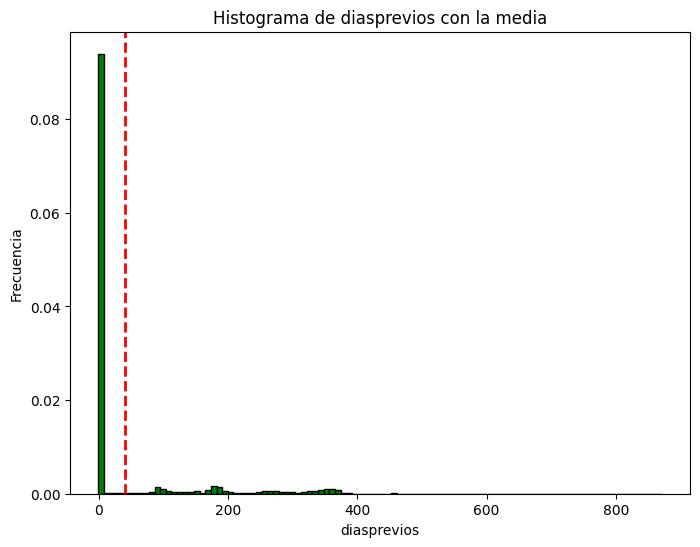

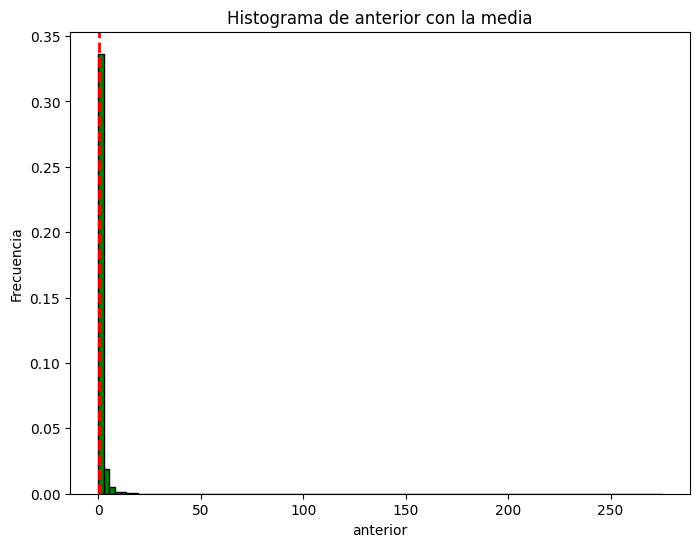

In [24]:
# prompt: Histograma para cada columna numerica, que utilice el numero de registros pero que muestre la distribucion de los datos mas no el numero de registros

for columna in numericas:
  #tanaño del histograma
  plt.figure(figsize=(8, 6))
  # histograma
  plt.hist(data_rename_2[columna], bins=100, color='Green',edgecolor='black', density=True)
  # agrega una linea vertical para mostrar la media
  plt.axvline(media[columna], color='red', linestyle='dashed', linewidth=2)
  # titulo de los histogramas
  plt.title(f'Histograma de {columna} con la media')
  plt.xlabel(columna)
  plt.ylabel('Frecuencia')
  plt.show()

In [25]:
# mostrar cantidad de registros antes de realizar una transformacion, limpieza o filtro
print(f'tamaño del set antes de eliminar las filas repetidas:{data_rename_2.shape}')
data_rename_2.drop_duplicates(inplace=True)
print(f'tamaño del set despues de eliminar las filas repetidas:{data_rename_2.shape}')

tamaño del set antes de eliminar las filas repetidas:(45207, 17)
tamaño del set despues de eliminar las filas repetidas:(45203, 17)


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.

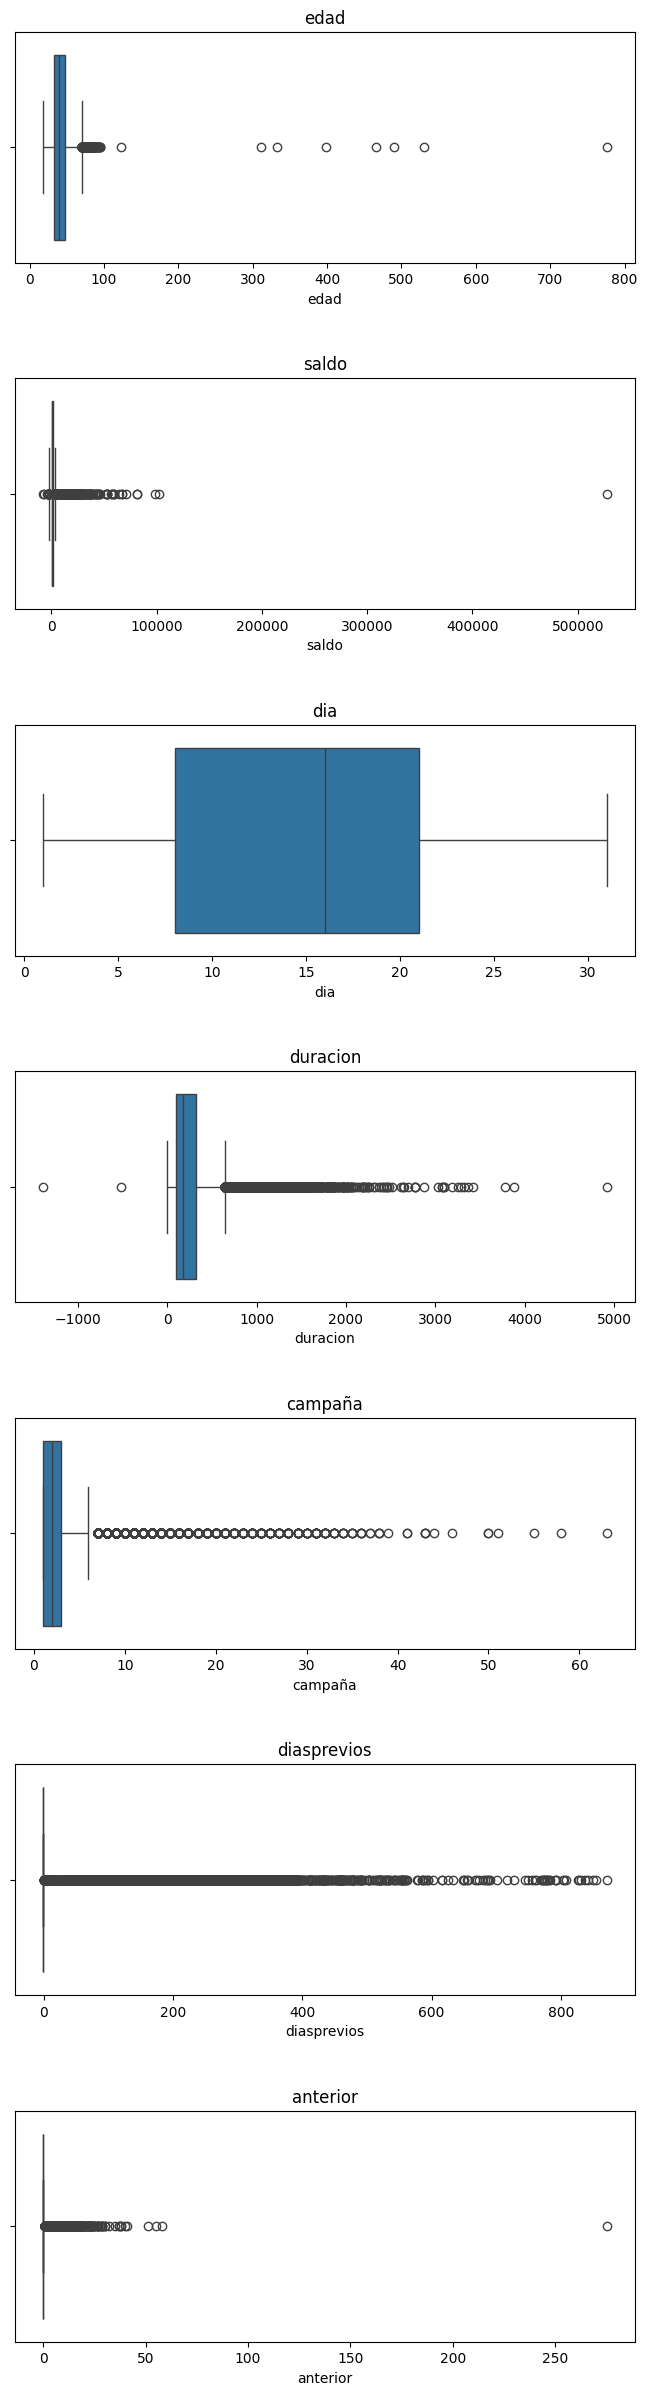

In [26]:
# generar graficas indiciduales para las variables numericas
# estan en rangos diferentes
fig, ax = plt.subplots(nrows = 7, ncols = 1, figsize = (8, 30))
fig.subplots_adjust(hspace=0.5)
for i, col in enumerate(numericas):
  sns.boxplot(x=data_rename_2[col], ax=ax[i])
  ax[i].set_title(col)

In [27]:
# eliminar filas con "age">100
print(f'tamaño del set antes de eliminar registros de edad: {data_rename_2.shape}')
data_clean = data_rename_2.drop(data_rename_2[data_rename_2['edad']>100].index)
print(f'tamaño del set despues de eliminar registros de edad: {data_clean.shape}')


tamaño del set antes de eliminar registros de edad: (45203, 17)
tamaño del set despues de eliminar registros de edad: (45195, 17)


In [28]:
# elimino filas con duracion<0 , no puede haber datos de tiempo negativo
print(f'tamaño del set antes de eliminar registros de duracion: {data_clean.shape}')
data_clean = data_clean.drop(data_clean[data_clean['duracion']<0].index)
print(f'tamaño del set despues de eliminar registros de duracion: {data_clean.shape}')

tamaño del set antes de eliminar registros de duracion: (45195, 17)
tamaño del set despues de eliminar registros de duracion: (45193, 17)


In [29]:
# eliminar filas con "anterior">100
print(f'tamaño del set antes de eliminar registro de anterior: {data_clean.shape}')
data_clean = data_clean.drop(data_clean[data_clean['anterior']>100].index)
print(f'tamaño del set despues de eliminar registro de anterior: {data_clean.shape}')

tamaño del set antes de eliminar registro de anterior: (45193, 17)
tamaño del set despues de eliminar registro de anterior: (45192, 17)


<ipython-input-30-66f9d43a7032>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data_clean, ax=ax[i], palette='colorblind')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a 

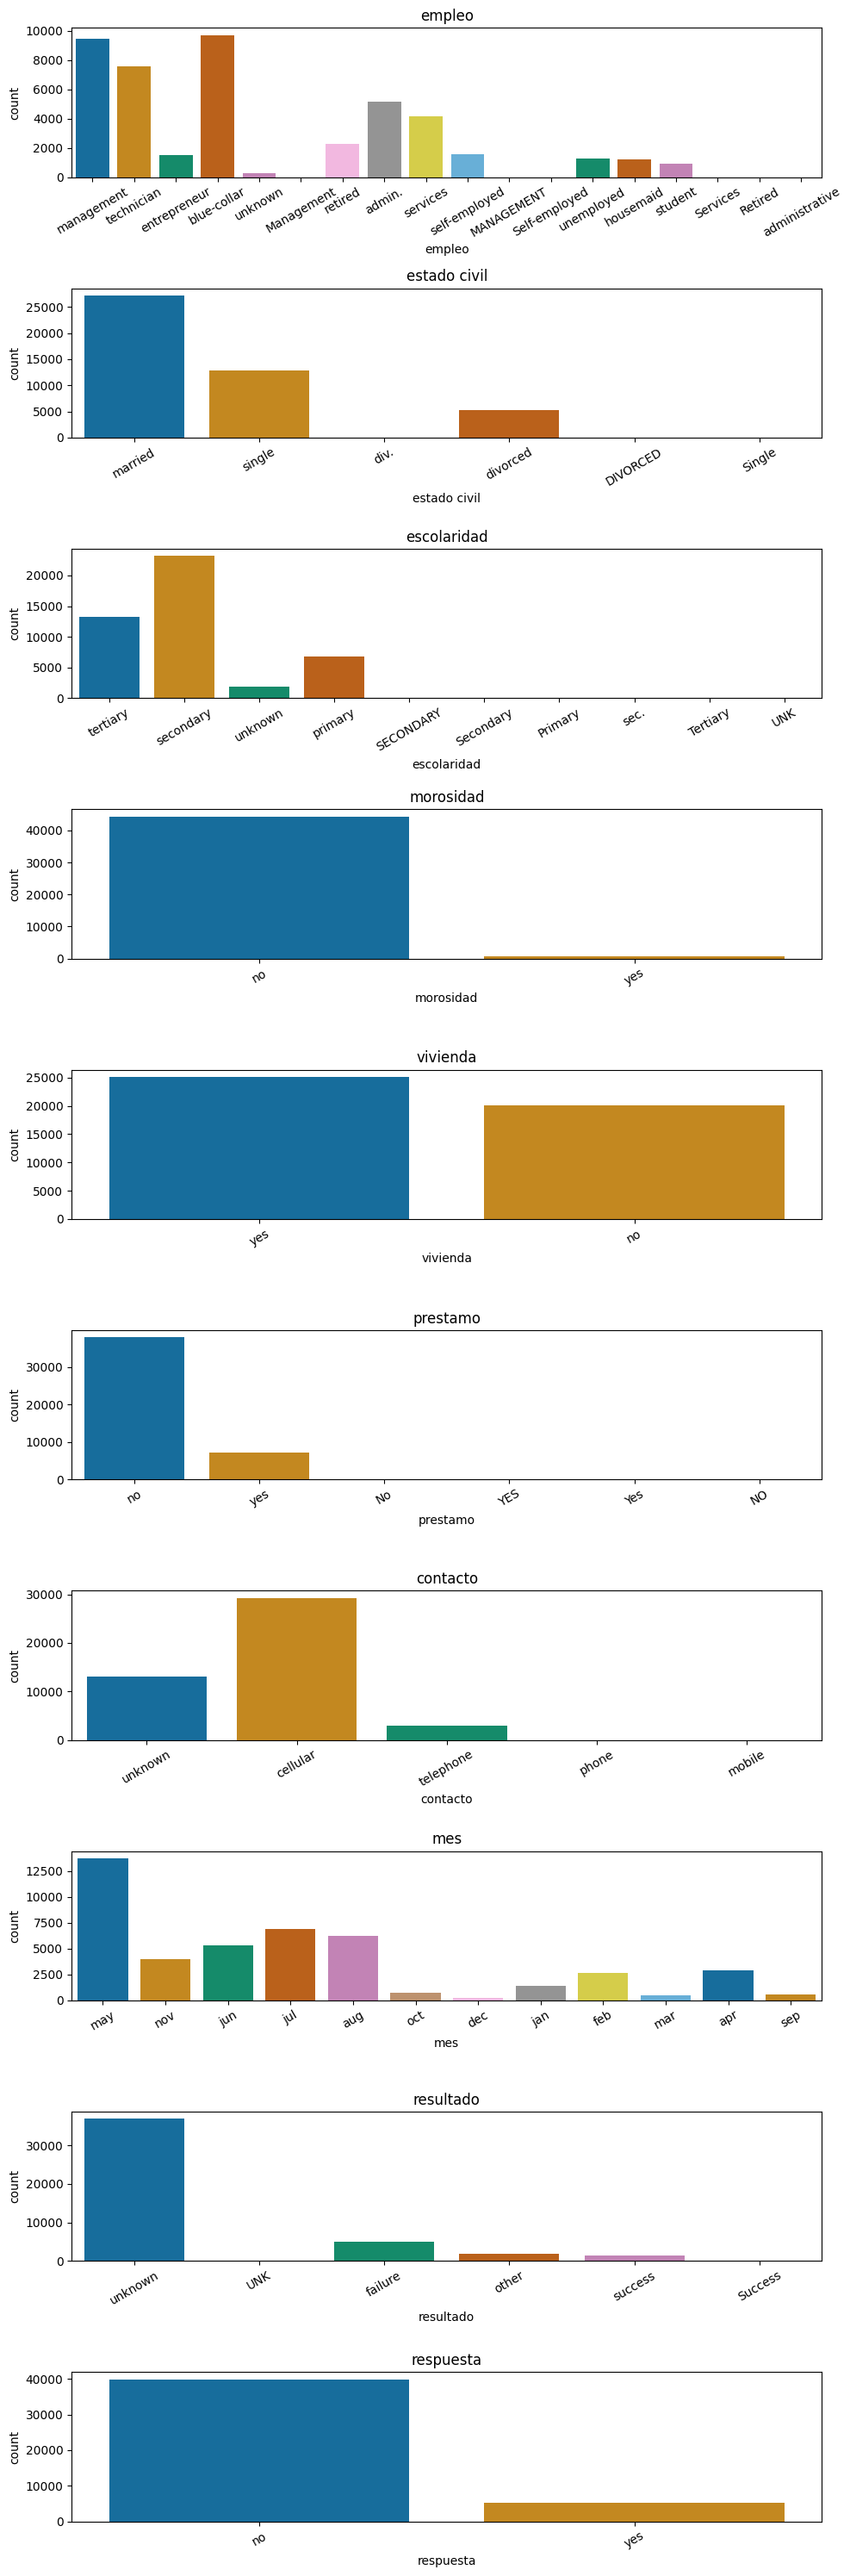

In [30]:
# LIMPIEZA DE ERRORES TIPOGRAFICOS
# graficar los subniveles de cada viarbale categorica
cols_cat = ['empleo', 'estado civil', 'escolaridad', 'morosidad', 'vivienda', 'prestamo', 'contacto', 'mes', 'resultado', 'respuesta']
fig, ax = plt.subplots(nrows=10, ncols=1, figsize=(10, 30))
fig.subplots_adjust(hspace=1)

for i, col in enumerate(cols_cat):
    sns.countplot(x=col, data=data_clean, ax=ax[i], palette='colorblind')
    ax[i].set_title(col)
    ax[i].tick_params(axis='x', rotation=30)

plt.tight_layout()
plt.show()

<ipython-input-31-eb657e260333>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data_clean, ax=ax[i] if len(cols_cat) > 1 else ax, palette='colorblind')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: Future

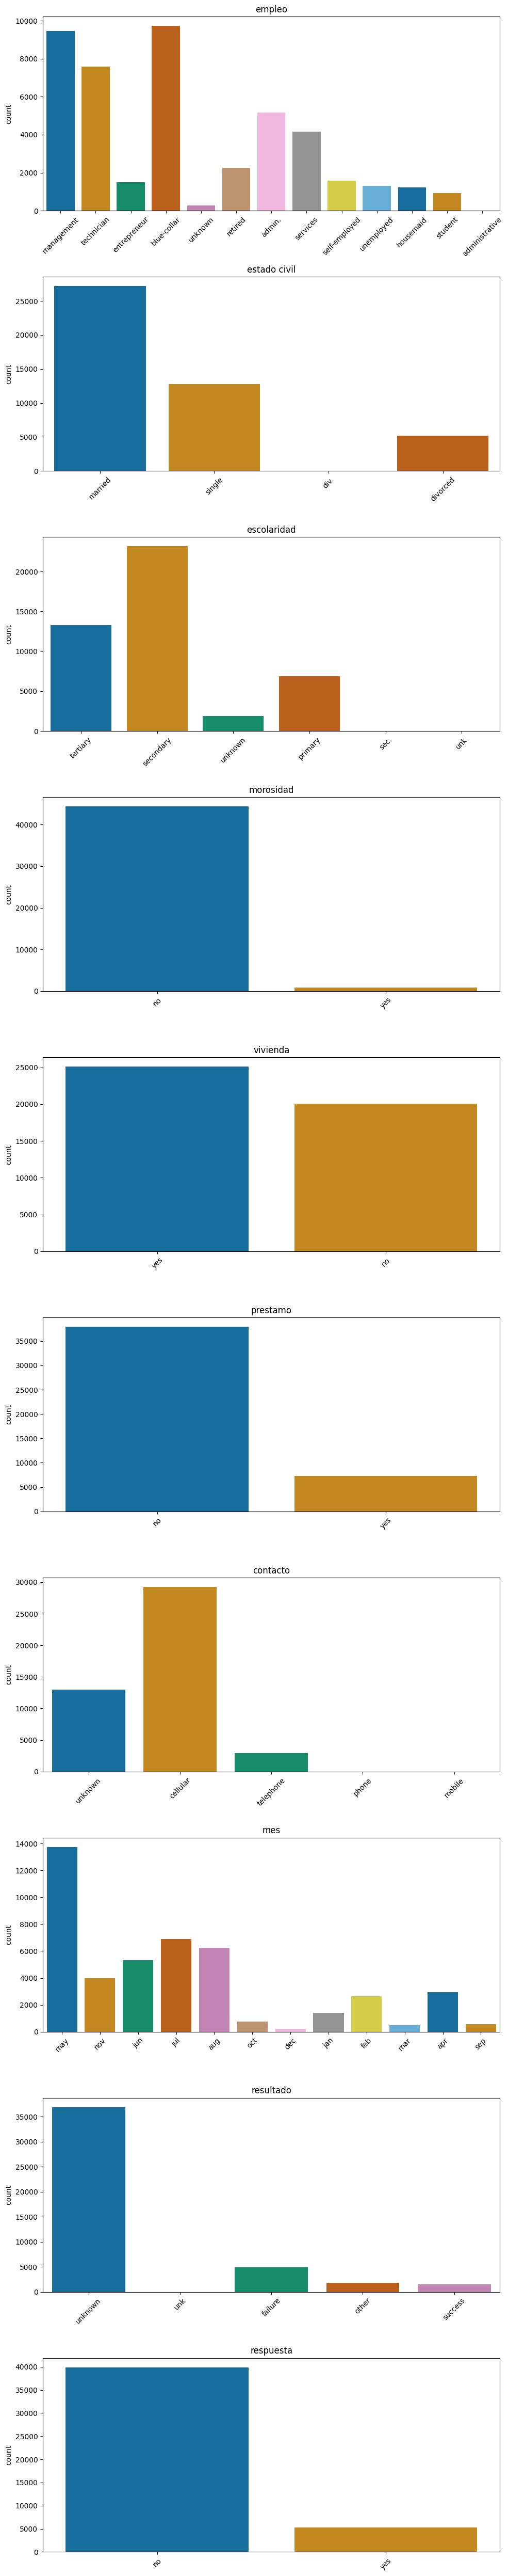

In [31]:
# Unificar subniveles con errores de tipado como mayúscula o minúsculas
for column in cols_cat:
    data_clean[column] = data_clean[column].astype(str).str.lower()

# Graficar nuevamente
fig, ax = plt.subplots(nrows=len(cols_cat), ncols=1, figsize=(10, 5*len(cols_cat)))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(cols_cat):
    sns.countplot(x=col, data=data_clean, ax=ax[i] if len(cols_cat) > 1 else ax, palette='colorblind')
    ax[i].set_title(col) if len(cols_cat) > 1 else ax.set_title(col)
    ax[i].tick_params(axis='x', rotation=45) if len(cols_cat) > 1 else ax.tick_params(axis='x', rotation=45)
    ax[i].set_xlabel('') if len(cols_cat) > 1 else ax.set_xlabel('')

plt.tight_layout()
plt.show()

In [32]:
# job: unificar admin. y administrative
print(data_clean['empleo'].unique())
data_clean['empleo'] = data_clean['empleo'].str.replace('admin.','administrative', regex=False)
print(data_clean['empleo'].unique())

['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student' 'administrative']
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'administrative' 'services' 'self-employed' 'unemployed'
 'housemaid' 'student']


In [33]:
# Estado civil : unificar div. y divorced
print(data_clean['estado civil'].unique())
data_clean['estado civil'] = data_clean['estado civil'].str.replace('div.','divorced', regex=False)
print(data_clean['estado civil'].unique())

['married' 'single' 'div.' 'divorced']
['married' 'single' 'divorced']


In [34]:
# escolaridad: unificar sec. y secondary, unk y unknown
print(data_clean['escolaridad'].unique())
data_clean['escolaridad'] = data_clean['escolaridad'].str.replace('sec.','secondary', regex=False)
data_clean.loc[data_clean['escolaridad'] == 'unk', 'escolaridad'] = 'unknown'
print(data_clean['escolaridad'].unique())

['tertiary' 'secondary' 'unknown' 'primary' 'sec.' 'unk']
['tertiary' 'secondary' 'unknown' 'primary']


In [35]:
# contacto: unificar telephone y phone
print(data_clean['contacto'].unique())
data_clean.loc[data_clean['contacto'] == 'phone', 'contacto'] = 'telephone'
data_clean.loc[data_clean['contacto'] == 'mobile', 'contacto'] = 'cellular'
print(data_clean['contacto'].unique())

['unknown' 'cellular' 'telephone' 'phone' 'mobile']
['unknown' 'cellular' 'telephone']


In [36]:
# resultado: unificar unk y unknown
print(data_clean['resultado'].unique())
data_clean.loc[data_clean['resultado'] == 'unk', 'resultado'] = 'unknown'
print(data_clean['resultado'].unique())

['unknown' 'unk' 'failure' 'other' 'success']
['unknown' 'failure' 'other' 'success']


In [37]:
# se verifica cuantos registros quedó la data con la limpieza respectiva
data_clean.shape

(45192, 17)

In [38]:
# edad(age) promedio(mean) de los clientes interesados en adquirir un certificado de depoósito(y)
edad_promedio_interesados = data_clean[data_clean['respuesta']=='yes']['edad'].mean()
print("1. edad promedio de los cloentes interesados en adquirir un producto:",edad_promedio_interesados)

1. edad promedio de los cloentes interesados en adquirir un producto: 41.665468306527906


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


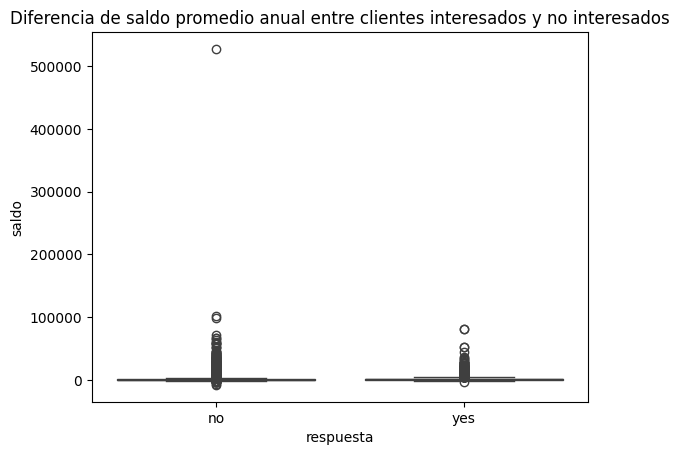

In [39]:
# diferencia de ingresos entre clientes interesados y no interesados:
sns.boxplot(x='respuesta',y='saldo',data=data_clean)
plt.title('Diferencia de saldo promedio anual entre clientes interesados y no interesados')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


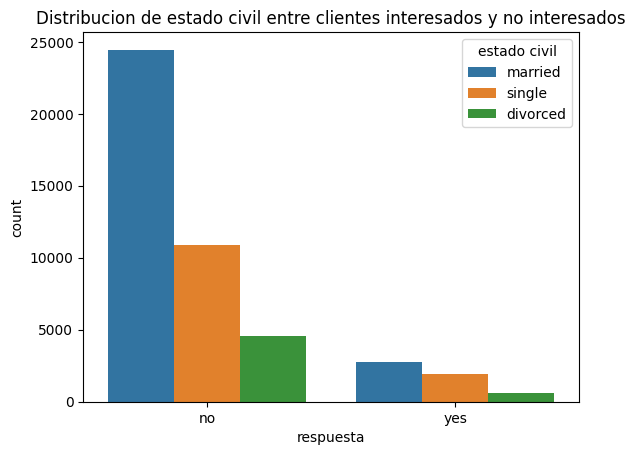

In [40]:
# distribucion de estado civil entre clientes interesados:
sns.countplot(x='respuesta',hue='estado civil',data=data_clean)
plt.title('Distribucion de estado civil entre clientes interesados y no interesados')
plt.show()

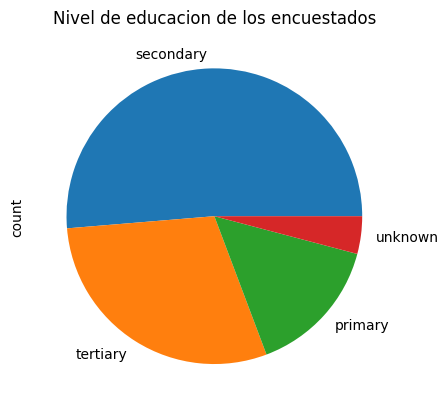

In [41]:
# grafico de torta o circular para representar el nivel de educacion de los encuestados
data_clean.escolaridad.value_counts().plot.pie()
plt.title('Nivel de educacion de los encuestados')
plt.show()

In [42]:
data_clean.escolaridad.describe()

,escolaridad
count,45192
unique,4
top,secondary
freq,23189


In [43]:
# contar registros por grado de escolaridad
contar_escolaridad = data_clean.escolaridad.value_counts()
print(contar_escolaridad)

escolaridad
secondary    23189
tertiary     13298
primary       6848
unknown       1857
Name: count, dtype: int64


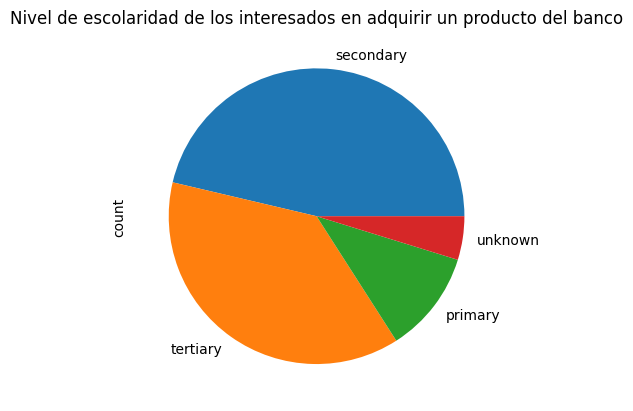

In [44]:
# graficar el nivel de escolaridad de los interesados en adquirir un producto del banco
nivel_escolaridad = data_clean[data_clean['respuesta']=='yes'].escolaridad.value_counts()
nivel_escolaridad.plot.pie()
plt.title('Nivel de escolaridad de los interesados en adquirir un producto del banco')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


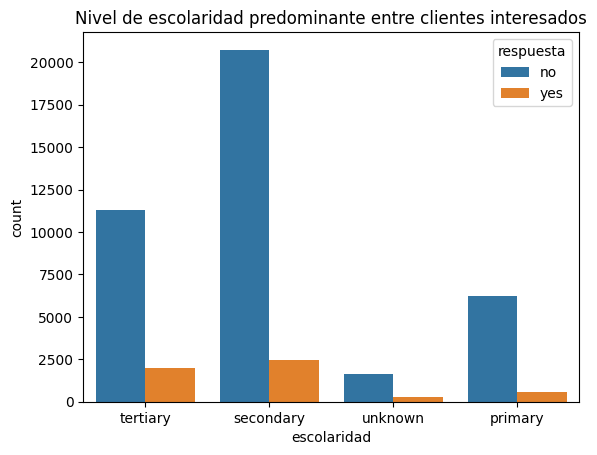

In [45]:
# Nivel de escolaridad predominante entre clientes interesados
sns.countplot(x='escolaridad',hue='respuesta',data=data_clean)
plt.title('Nivel de escolaridad predominante entre clientes interesados')
plt.show()

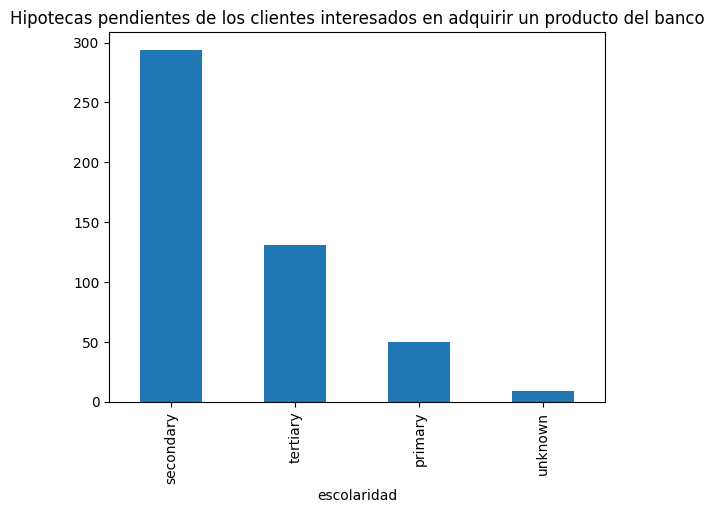

In [48]:
# grafico de barras por escolaridad de los clientes que tienen hipotecas pendientes interesados en adquirir un producto del banco
clientes_hipotecas_interesados = data_clean[(data_clean['respuesta']=='yes') & (data_clean['prestamo']=='yes')].escolaridad.value_counts()
clientes_hipotecas_interesados.plot.bar()
plt.title('Hipotecas pendientes de los clientes interesados en adquirir un producto del banco')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


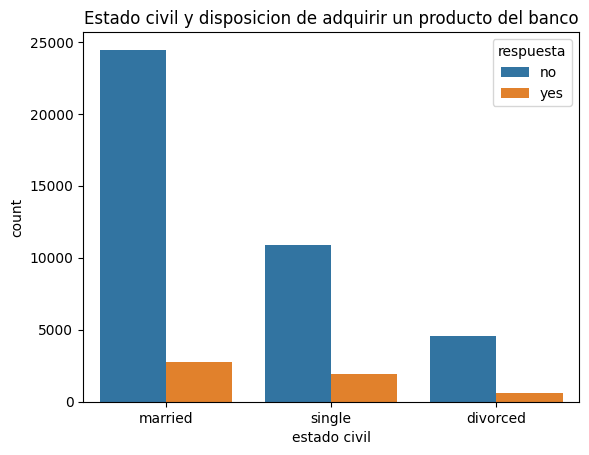

In [49]:
# grafico de barras que muestra el estado civil y la disposicion de adquirir un producto del bancp
sns.countplot(x='estado civil',hue='respuesta',data=data_clean)
plt.title('Estado civil y disposicion de adquirir un producto del banco')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


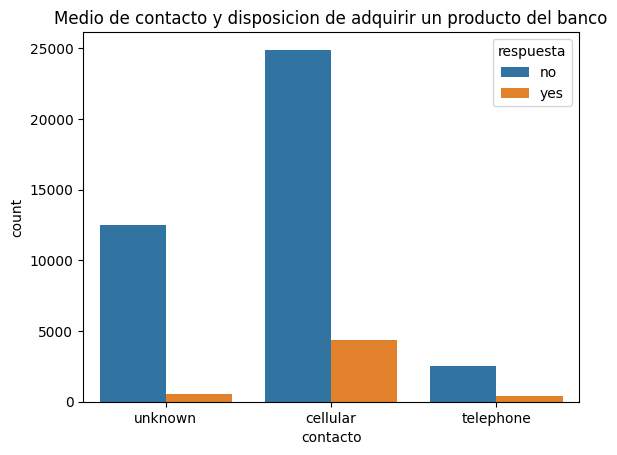

In [50]:
# grafico de barras que muestra el medio de contacto y la disposicion de adquirir un producto
sns.countplot(x='contacto',hue='respuesta',data=data_clean)
plt.title('Medio de contacto y disposicion de adquirir un producto del banco')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


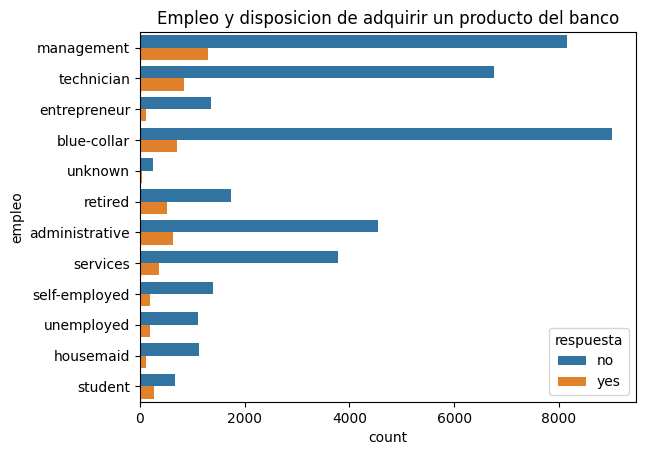

In [52]:
# segun empleo y disposicion de querer adquirir un producto
sns.countplot(y='empleo',hue='respuesta',data=data_clean)
plt.title('Empleo y disposicion de adquirir un producto del banco')
plt.show()